In [1]:
# Library Imports
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

# Local imports
import pressure_model as pm
import gradient_descent as gd

# Jupyter Notebook specific imports
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Pressure Model:
------
### Generate the model parameters

In [2]:
#####################################################################
## CHANGE ONLY THE CONSTANTS a, b, c TO AFFECT OUR PRESSURE MODEL ###
M0 = 5.e3   # does not contribute to this model
a = 8.e-5   # <- change this
b = 1.e-2   # <- change this
c = 7.e-3   # <- change this 
d = 5.e-1   # does not contribute to this model
#####################################################################

In [3]:
# Get the data and use this for bounds
Ps_data = np.genfromtxt('data_sources/cs_p.txt',dtype=float,delimiter=', ',skip_header=1).T
tmin = Ps_data[0,0]
tmax = Ps_data[0,-1]
P0 = Ps_data[1,0]

# Create a model keyword arguments dictionary.
# This can be passed to function as f=pressure_ode with **model.
model = {
    'f' : pm.pressure_ode,
    't0' : tmin,
    't1' : tmax,
    'dt' : 0.01,
    'P0' : P0,
    'pars' : [M0,a,b,c,d]
}

### The model:

In [7]:
@interact(a=widgets.FloatSlider(min=0, max=1e-2, step=1e-5, value=0.00077, continuous_update=False),
        b=widgets.FloatSlider(min=0, max=4e-2, step=1e-2, value=0.041, continuous_update=False),
        c=widgets.FloatSlider(min=0, max=4e-2, step=1e-2, value=0.006, continuous_update=False)
    )
def plot_model(a, b, c, model=[model]):
    theta = [a,b,c]
    model['pars'][1:len(theta)+1] = theta 
    ts_model,Ps_model = pm.solve_pressure_ode(**model)

    # Print an objective function for the model:
    print("Objective Function:", pm.pressure_objective_function(theta, model, 40))
    print("Theta:", theta)
    
    f,ax = plt.subplots(1,1)
    ax.plot(Ps_data[0,:],Ps_data[1,:],'kx',label='Measured Data')
    ax.plot(ts_model,Ps_model,'r-',label='Fitted Model')
    ax.set_xlabel('Year of observation [A.D.]')
    ax.set_ylabel('Reservoir pressure [MPa]')
    ax.legend()
    ax.set_title('Comparison of measured pressure and modelled pressure over time in the Ohaaki geothermal reservoir')
    plt.show()

interactive(children=(FloatSlider(value=0.00077, continuous_update=False, description='a', max=0.01, step=1e-0…

Objective Function: 11.257324199798173
Theta: [9.22111081e-06 1.13997228e-02 3.46995958e-03]


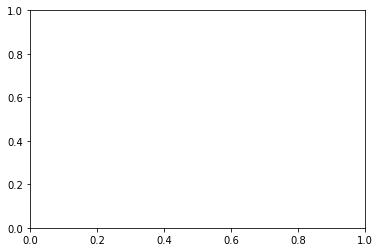

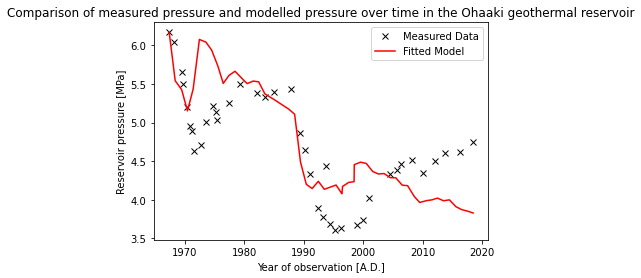

Objective Function: 11.256016416035312
Theta: [4.79457150e-06 1.13996297e-02 3.47002775e-03]


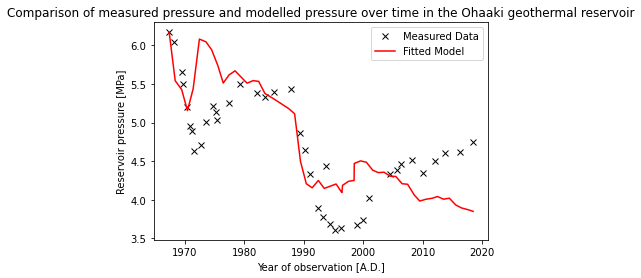

Objective Function: 11.258866784158377
Theta: [2.90536952e-06 1.13996157e-02 3.47014213e-03]


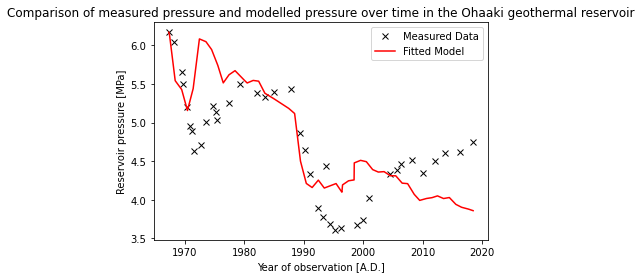

Objective Function: 11.260694723524686
Theta: [2.09773264e-06 1.13996354e-02 3.47027613e-03]


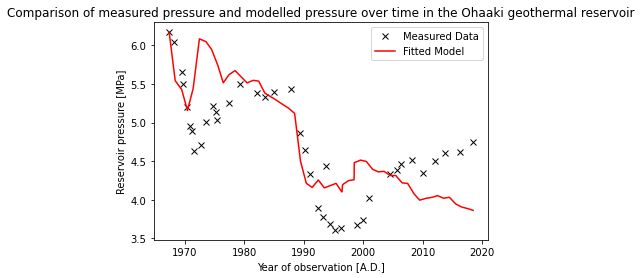

Objective Function: 11.261579054255842
Theta: [1.75111784e-06 1.13996696e-02 3.47041842e-03]


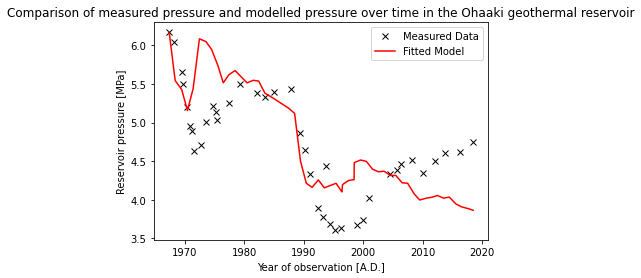

Objective Function: 11.261968925433221
Theta: [1.60101571e-06 1.13997099e-02 3.47056416e-03]


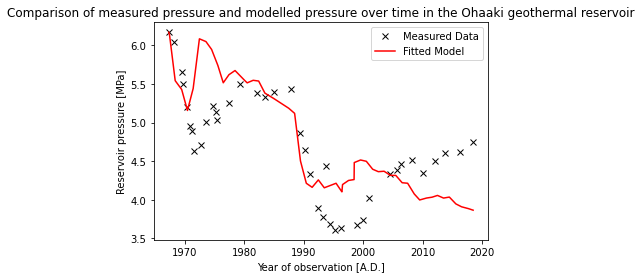

Objective Function: 11.2621312888238
Theta: [1.53467877e-06 1.13997528e-02 3.47071129e-03]


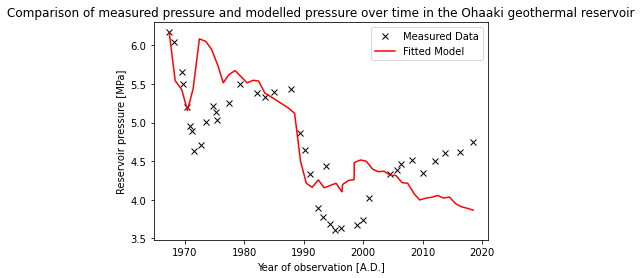

Objective Function: 11.262193650374494
Theta: [1.50404835e-06 1.13997968e-02 3.47085895e-03]


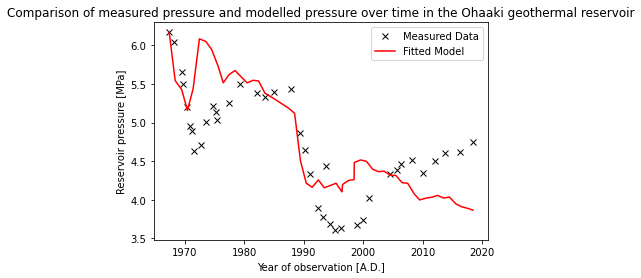

Objective Function: 11.262212851824517
Theta: [1.48863944e-06 1.13998413e-02 3.47100675e-03]


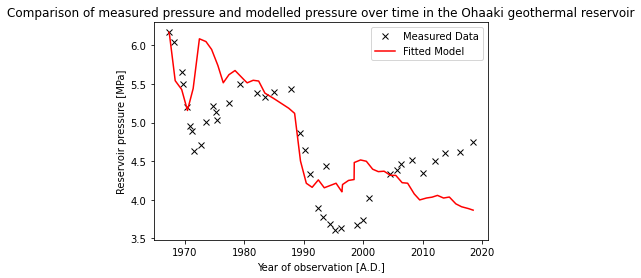

Objective Function: 11.262213574787296
Theta: [1.47972028e-06 1.13998860e-02 3.47115453e-03]


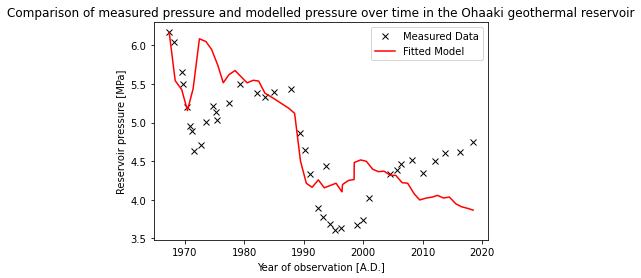

Objective Function: 11.262206422063887
Theta: [1.47356893e-06 1.13999308e-02 3.47130223e-03]


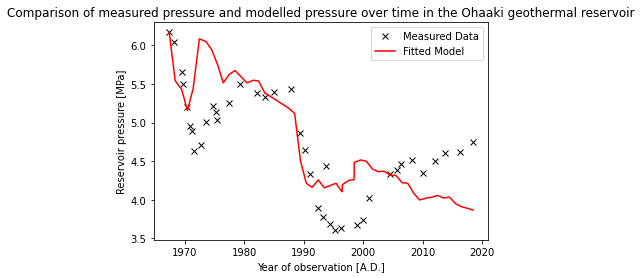

Objective Function: 11.262195928028689
Theta: [1.46859891e-06 1.13999756e-02 3.47144982e-03]


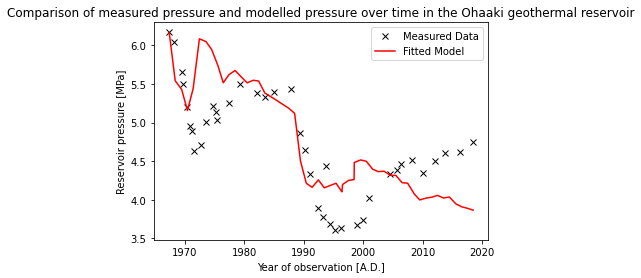

Objective Function: 11.262184028147981
Theta: [1.46413399e-06 1.14000205e-02 3.47159728e-03]


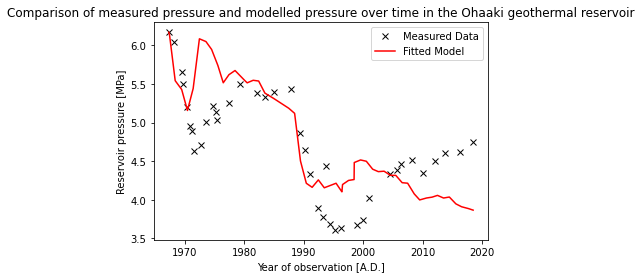

Objective Function: 11.262171547877669
Theta: [1.45988589e-06 1.14000653e-02 3.47174461e-03]


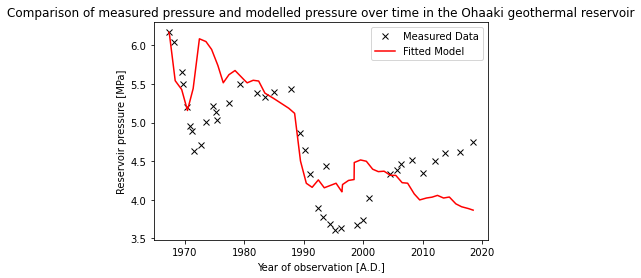

Objective Function: 11.262158839123359
Theta: [1.45573177e-06 1.14001101e-02 3.47189181e-03]


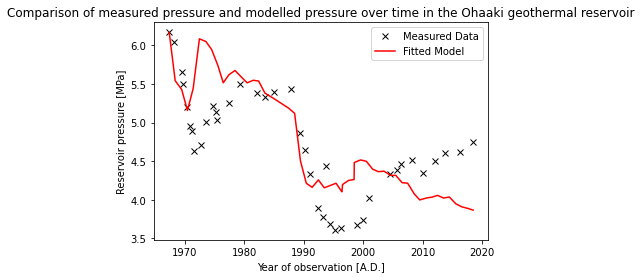

Objective Function: 11.262146051866129
Theta: [1.45161923e-06 1.14001549e-02 3.47203888e-03]


KeyboardInterrupt: 

In [5]:
theta = [1.96e-05, 0.0114, 0.00347]
f,ax = plt.subplots(1,1)
theta = gd.grad_descent(pm.pressure_objective_function, theta, 1e-6, 100, model, pm.plot_model)
print(theta)
